# 1. Association rules and Frequent Itemsets

The Apriori algorithm calculates rules that express probabilistic relationships between items in frequent itemsets.  
An association rule states that an item or group of items implies the presence of another item with some probability.

## 1.1 Antecedent and Consequent

The IF component of an association rule is known as the antecedent.   
The THEN component is known as the consequent.   
The antecedent and the consequent are disjoint; they have no items in common.

## 1.2 Support

The support of a rule indicates how frequently the items in the rule occur together. For example, cereal and milk might appear together in 40% of the transactions. If so, the following two rules would each have a support of 40%.

Support is the ratio of transactions that include all the items in the antecedent and consequent to the number of total transactions.

support(A implies B) = P(A, B)

## 1.3 Confidence

Rules have an associated , which is the conditional probability that the consequent will occur given the occurrence of the antecedent. The minimum confidence for rules can be specified by the user.

For example, cereal might appear in 50 transactions; 40 of the 50 might also include milk. The rule confidence would be: cereal implies milk with 80% confidence.

confidence (A implies B) = P (B/A), which is equal to P(A, B) / P(A)

## 1.4 Lift

The theory is that item pairs that co-occur more frequently together should be selected, but there is a need to prove that such pairings are not occurring by chance due to individual items being very popular. This is why the lift metric enables retailers to compute the support of both items sold together compared to individual items.   

lift = (Rule Support) /(Support(Antecedent) * Support(Consequent))

If lift is > 1, it means that pairing such items together can provide a boost in sales as indicated by historical data.

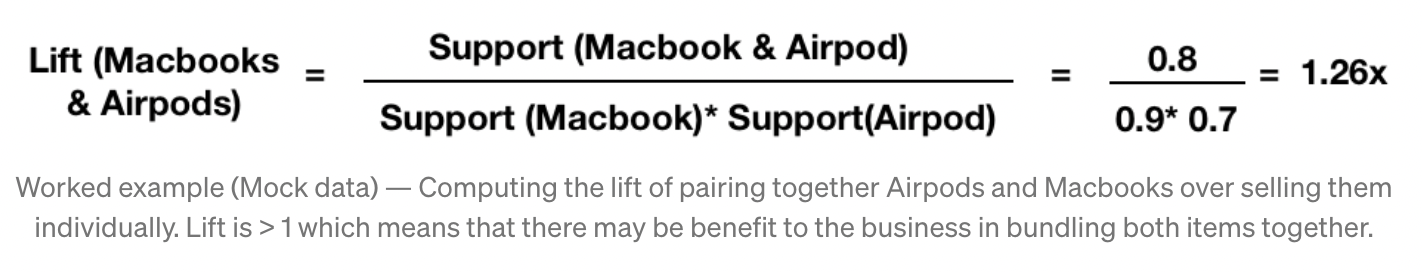

# 2. Coding

In [62]:
import pandas as pd 
import numpy as np
orders = pd.read_csv('Orders Report (P6M).xlsx - sg store.csv')

## 2.1 Read in retail dataset 

In [63]:
orders.head(5)

,ID,Name,Lineitem name,Product,Lineitem sku,Lineitem quantity,Lineitem price,Discount Amount,Subtotal,Shipping,Total,Currency,Financial Status,Lineitem fulfillment status,Refunded Amount,Fulfilled at,Created at
0,1,#4411,Sperm Guide - 1-pack,Sperm Guide,HX0104,1,68.0,0.0,68.0,0.00,68.00,SGD,paid,fulfilled,0.0,2022-12-01,2022-11-30
1,2,#4407,Sperm Count Test Kit (Sperm OK by Artron),Sperm Count Test Kit (Sperm OK by Artron),HJ0301,1,45.0,0.0,79.5,0.00,79.50,SGD,paid,fulfilled,0.0,2022-11-30,2022-11-30
2,3,#4407,Conceive Plus Fertility Lubricant,Conceive Plus Fertility Lubricant,ConceivePlus1,1,34.5,NaN,NaN,NaN,NaN,NaN,NaN,fulfilled,NaN,2022-11-30,2022-11-30
3,4,#4406,Sperm Count Test Kit (Sperm OK by Artron),Sperm Count Test Kit (Sperm OK by Artron),HJ0301,1,45.0,4.5,40.5,6.49,46.99,SGD,paid,fulfilled,0.0,2022-11-30,2022-11-30
4,5,#4405,Sperm Guide - 3-pack,Sperm Guide,HX0101,1,138.0,0.0,138.0,0.00,138.00,SGD,paid,fulfilled,0.0,2022-11-30,2022-11-30


## 2.2 Restructure the dataset into an order ID, product list format

In [64]:
orders_filter = orders[['Name', 'Product']]  #Ignore date and purchase address for now
orders_filter = orders_filter.reset_index()
orders_filter.head(5)

,index,Name,Product
0,0,#4411,Sperm Guide
1,1,#4407,Sperm Count Test Kit (Sperm OK by Artron)
2,2,#4407,Conceive Plus Fertility Lubricant
3,3,#4406,Sperm Count Test Kit (Sperm OK by Artron)
4,4,#4405,Sperm Guide


In [65]:
df_orders = orders_filter.pivot_table(index = 'Name', columns = 'Product', aggfunc = 'count')
df_orders.head()

index                                                      \
Product Applicator Extra Applicator Only CoQ10 Gummies CoQ10 With Vitamin B1   
Name                                                                           
#2377                NaN             1.0           NaN                   NaN   
#2378                NaN             NaN           NaN                   NaN   
#2379                NaN             1.0           NaN                   NaN   
#2380                NaN             1.0           NaN                   NaN   
#2381                NaN             1.0           NaN                   NaN   

                                                                              \
Product Conceive Plus Fertility Lubricant Folic Acid + CoQ10 with Vitamin B1   
Name                                                                           
#2377                                 NaN                                NaN   
#2378                                 NaN                                NaN   
#2379                                 NaN                                NaN   
#2380                                 NaN                                NaN   
#2381                                 NaN                                NaN   

                                                       \
Product Folic Acid Fertility Support Hormone Test Kit   
Name                                                    
#2377                            NaN              NaN   
#2378                            NaN              NaN   
#2379                            NaN              NaN   
#2380                            NaN              NaN   
#2381                            NaN              NaN   

                                               \
Product Ovulation Test Kit (by Point of Care)   
Name                                            
#2377                                     NaN   
#2378                                     NaN   
#2379                                     NaN   
#2380                                     NaN   
#2381                                     NaN   

                                               \
Product Pregnancy Test Kit (by Point of Care)   
Name                                            
#2377                                     NaN   
#2378                                     NaN   
#2379                                     NaN   
#2380                                     NaN   
#2381                                     NaN   

                                                               
Product Sperm Count Test Kit (Sperm OK by Artron) Sperm Guide  
Name                                                           
#2377                                         NaN         NaN  
#2378                                         NaN         1.0  
#2379                                         NaN         NaN  
#2380                                         NaN         NaN  
#2381                                         NaN         NaN

In [66]:
# Fill null values in the dataframe
df_orders = df_orders.fillna(0)
df_orders.head()

index                                                      \
Product Applicator Extra Applicator Only CoQ10 Gummies CoQ10 With Vitamin B1   
Name                                                                           
#2377                0.0             1.0           0.0                   0.0   
#2378                0.0             0.0           0.0                   0.0   
#2379                0.0             1.0           0.0                   0.0   
#2380                0.0             1.0           0.0                   0.0   
#2381                0.0             1.0           0.0                   0.0   

                                                                              \
Product Conceive Plus Fertility Lubricant Folic Acid + CoQ10 with Vitamin B1   
Name                                                                           
#2377                                 0.0                                0.0   
#2378                                 0.0                                0.0   
#2379                                 0.0                                0.0   
#2380                                 0.0                                0.0   
#2381                                 0.0                                0.0   

                                                       \
Product Folic Acid Fertility Support Hormone Test Kit   
Name                                                    
#2377                            0.0              0.0   
#2378                            0.0              0.0   
#2379                            0.0              0.0   
#2380                            0.0              0.0   
#2381                            0.0              0.0   

                                               \
Product Ovulation Test Kit (by Point of Care)   
Name                                            
#2377                                     0.0   
#2378                                     0.0   
#2379                                     0.0   
#2380                                     0.0   
#2381                                     0.0   

                                               \
Product Pregnancy Test Kit (by Point of Care)   
Name                                            
#2377                                     0.0   
#2378                                     0.0   
#2379                                     0.0   
#2380                                     0.0   
#2381                                     0.0   

                                                               
Product Sperm Count Test Kit (Sperm OK by Artron) Sperm Guide  
Name                                                           
#2377                                         0.0         0.0  
#2378                                         0.0         1.0  
#2379                                         0.0         0.0  
#2380                                         0.0         0.0  
#2381                                         0.0         0.0

In [67]:
# Convert df orders to boolean
col_names = df_orders.columns
df_orders = df_orders[col_names].astype('bool')
df_orders.head()

index                                                      \
Product Applicator Extra Applicator Only CoQ10 Gummies CoQ10 With Vitamin B1   
Name                                                                           
#2377              False            True         False                 False   
#2378              False           False         False                 False   
#2379              False            True         False                 False   
#2380              False            True         False                 False   
#2381              False            True         False                 False   

                                                                              \
Product Conceive Plus Fertility Lubricant Folic Acid + CoQ10 with Vitamin B1   
Name                                                                           
#2377                               False                              False   
#2378                               False                              False   
#2379                               False                              False   
#2380                               False                              False   
#2381                               False                              False   

                                                       \
Product Folic Acid Fertility Support Hormone Test Kit   
Name                                                    
#2377                          False            False   
#2378                          False            False   
#2379                          False            False   
#2380                          False            False   
#2381                          False            False   

                                               \
Product Ovulation Test Kit (by Point of Care)   
Name                                            
#2377                                   False   
#2378                                   False   
#2379                                   False   
#2380                                   False   
#2381                                   False   

                                               \
Product Pregnancy Test Kit (by Point of Care)   
Name                                            
#2377                                   False   
#2378                                   False   
#2379                                   False   
#2380                                   False   
#2381                                   False   

                                                               
Product Sperm Count Test Kit (Sperm OK by Artron) Sperm Guide  
Name                                                           
#2377                                       False       False  
#2378                                       False        True  
#2379                                       False       False  
#2380                                       False       False  
#2381                                       False       False

## 2.3 Print the support of each item

To see how frequently the item occurs over the total number of orders. 
We only count each item once in an order for simplicity.

<AxesSubplot:xlabel='None,Product'>

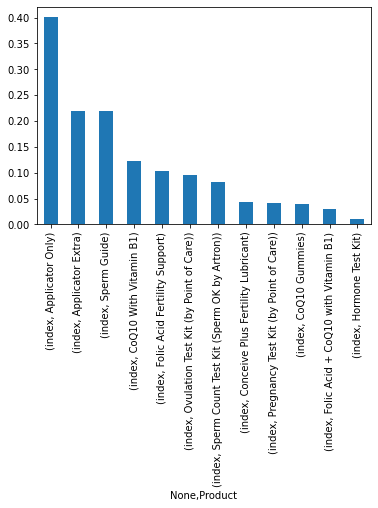

In [68]:
df_orders.mean().sort_values(ascending=False).plot(kind='bar')

## 2.4 Use the apriori algorithm to identify a set of meaningful rules

One way to decide which products can be marketed together is to compute all possible pairs of items (assuming we want to market 2 at a time) and work out various metrics such as the confidence and lift in transactions over selling these products individually.

These rules will help cross sell products that go well together to boost sales.   
We will only consider cross selling pairs of items together so this will consider 2 rule combinations only.

In [69]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [70]:
# Compute items that sell at minimum in 0.001% of all orders placed in the month (min_support)
frequent_itemsets = apriori(df_orders, min_support = 0.00000001, max_len = 2, use_colnames = True)

In [71]:
# Compute pairs of orders that have a meaningful lift of more than 1 in their sales when marketed together
frequent_itemsets_rules = association_rules(frequent_itemsets,metric = "lift", min_threshold = 1.0)

In [72]:
frequent_itemsets_rules_generics_antecedents.sort_values(by='lift', axis=0, ascending = False).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,20,"((index, Folic Acid Fertility Support))","((index, CoQ10 With Vitamin B1))",0.103275,0.123426,0.064484,0.624390,5.058835,0.051737,2.333737
1,21,"((index, CoQ10 With Vitamin B1))","((index, Folic Acid Fertility Support))",0.123426,0.103275,0.064484,0.522449,5.058835,0.051737,1.877758
2,45,"((index, Ovulation Test Kit (by Point of Care)))","((index, Pregnancy Test Kit (by Point of Care)))",0.094710,0.042317,0.013602,0.143617,3.393807,0.009594,1.118288
3,44,"((index, Pregnancy Test Kit (by Point of Care)))","((index, Ovulation Test Kit (by Point of Care)))",0.042317,0.094710,0.013602,0.321429,3.393807,0.009594,1.334111
4,26,"((index, Folic Acid + CoQ10 with Vitamin B1))","((index, Conceive Plus Fertility Lubricant))",0.030730,0.044332,0.003526,0.114754,2.588487,0.002164,1.079550
5,27,"((index, Conceive Plus Fertility Lubricant))","((index, Folic Acid + CoQ10 with Vitamin B1))",0.044332,0.030730,0.003526,0.079545,2.588487,0.002164,1.053034
6,8,"((index, Folic Acid + CoQ10 with Vitamin B1))","((index, CoQ10 Gummies))",0.030730,0.038791,0.003023,0.098361,2.535661,0.001831,1.066068
7,9,"((index, CoQ10 Gummies))","((index, Folic Acid + CoQ10 with Vitamin B1))",0.038791,0.030730,0.003023,0.077922,2.535661,0.001831,1.051180
8,30,"((index, Conceive Plus Fertility Lubricant))","((index, Ovulation Test Kit (by Point of Care)))",0.044332,0.094710,0.009572,0.215909,2.279678,0.005373,1.154572
9,31,"((index, Ovulation Test Kit (by Point of Care)))","((index, Conceive Plus Fertility Lubricant))",0.094710,0.044332,0.009572,0.101064,2.279678,0.005373,1.063109


## 2.5 Conclusion